# Modelagem de Equações Estruturais

**Autor:** João Fernando Serrajordia Rocha de Mello (Juka)
**Data:** 28/09/2021

Este notebook foi construído para dar suporte à minha apresentação de Modelagem de Equações Estruturais para a **Semana de Estatística e Pesquisa Operacional com R**.

#### Carregando o RPY2

O ```rpy2``` é um pacote muito conveniente para se utilizar em harmonia recursos do R e do Python. Vamos utilizar os recursos do Python para carregar a base de dados, e os do R para fazer a análise mais adiante.

In [2]:
%load_ext rpy2.ipython

#### Carregando os pacotes do Python

Vamos carregar o pandas, que seria análogo ao *tydiverse* do Python.

Em seguida, vamos carregar a base de dados, com o comando ```read_excel```


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns

In [38]:
import requests

url1 = 'http://www.statisticalassociates.com/data/wheaton.sav'
r = requests.get(url1, allow_redirects=True)
open('wheaton.sav', 'wb').write(r.content)
wheaton_cor = pd.read_spss('wheaton.sav')

url2='http://www.statisticalassociates.com/data/sem_sm2.dta'
r = requests.get(url2, allow_redirects=True)
open('sem_sm2.dta', 'wb').write(r.content)
stata_cor = pd.read_stata('sem_sm2.dta')

df = pd.read_excel('wheaton-generated.xls')
df.head()

,Anomia67,Powles67,Anomia71,Powles71,Educ,SEI
0,3.679837,4.296430,5.300860,2.843365,4.735030,24.883991
1,3.140880,-0.169261,1.431848,4.820048,5.524618,23.701451
2,10.766902,6.306139,7.142158,5.020585,0.703524,19.822332
3,8.899094,6.296796,9.389187,6.580506,0.325471,18.307839
4,13.121444,9.709165,11.972250,10.479046,-0.266189,16.960307


In [39]:
df.corr().values

array([[ 1.        ,  0.64734979,  0.58227767,  0.44631647, -0.38829269,
        -0.34302662],
       [ 0.64734979,  1.        ,  0.48274403,  0.52877266, -0.42104968,
        -0.32268664],
       [ 0.58227767,  0.48274403,  1.        ,  0.65624583, -0.35366125,
        -0.34341394],
       [ 0.44631647,  0.52877266,  0.65624583,  1.        , -0.36443166,
        -0.33003931],
       [-0.38829269, -0.42104968, -0.35366125, -0.36443166,  1.        ,
         0.53550803],
       [-0.34302662, -0.32268664, -0.34341394, -0.33003931,  0.53550803,
         1.        ]])

In [50]:
mean = (3, 3, 3, 3, 3, 20)
cov = np.array([[ 1   ,  0.65,  0.58,  0.45, -0.39,-0.34],
                [ 0.65,  1   ,  0.48,  0.53, -0.42,-0.32],
                [ 0.58,  0.48,  1.  ,  0.66, -0.35,-0.34],
                [ 0.45,  0.53,  0.66,  1.  , -0.36,-0.33],
                [-0.39, -0.42, -0.35, -0.36,  1.  , 0.53],
                [-0.34, -0.32, -0.34, -0.33,  0.53, 1.  ]])

arr = np.random.multivariate_normal(mean, cov, (1000))

df = pd.DataFrame(arr)
df.columns = ['Anomia67', 'Powles67', 'Anomia71', 'Powles71', 'Educ', 'SEI']
df.to_csv('wheaton-simulado.csv', index=False)

In [44]:
df.corr()

,Anomia67,Powles67,Anomia71,Powles71,Educ,SEI
Anomia67,1.000000,0.647654,0.571343,0.457164,-0.358226,-0.295904
Powles67,0.647654,1.000000,0.468673,0.534186,-0.412842,-0.314958
Anomia71,0.571343,0.468673,1.000000,0.638856,-0.337525,-0.293877
Powles71,0.457164,0.534186,0.638856,1.000000,-0.362106,-0.296622
Educ,-0.358226,-0.412842,-0.337525,-0.362106,1.000000,0.526557
SEI,-0.295904,-0.314958,-0.293877,-0.296622,0.526557,1.000000


<AxesSubplot:>

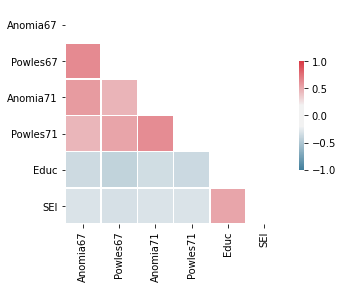

In [45]:
cor = df.corr()

cmap = sns.diverging_palette(230, 10, sep=50, as_cmap=True)

mask = np.triu(np.ones_like(cor, dtype=bool))

sns.heatmap(cor,  mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Exportando para o R

In [46]:
%%R -i df

library(lavaan)
library(psych)

R[write to console]: This is lavaan 0.6-8
lavaan is FREE software! Please report any bugs.

R[write to console]: 
Attaching package: ‘psych’


R[write to console]: The following object is masked from ‘package:lavaan’:

    cor2cov




#### Ajustando o modelo de equações estruturais

Vamos ajustar o modelo em dados simulados com base no exemplo clássico de Wheaton et al. (1977). Neste estudo, deseja-se estudar a alteração das sensações de **Anomia** e **Impotência** dos anos de 1967 a 1971, considerando a influência do **status sócioeconômico** (as três quantidades em negrito são construtos latentes).

O diagrama de caminhos que representa este modelo é dado pela figura abaixo:

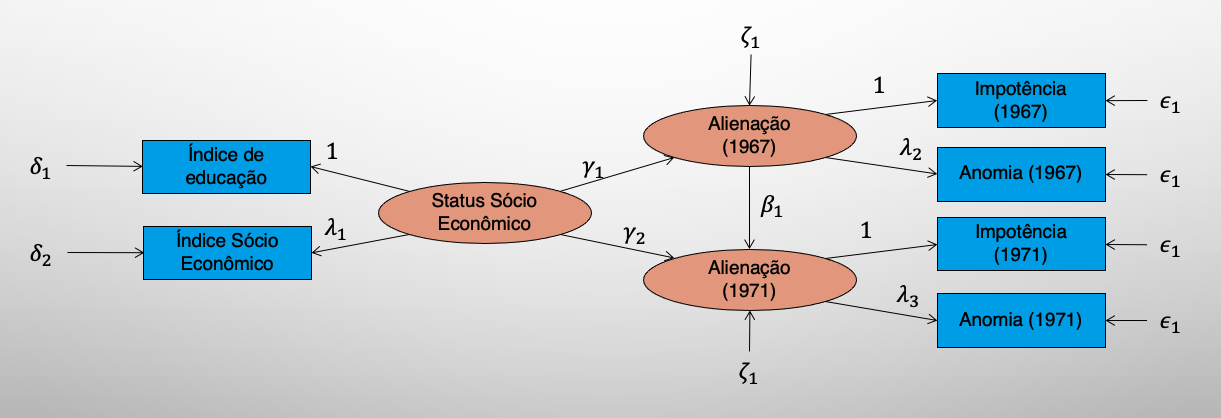

In [47]:
%%R

modelo <- "
ALI67 =~ Anomia67 + Powles67

ALI71 =~ Anomia71 + Powles71

SES =~ Educ + SEI

ALI71 ~ ALI67
SES ~ ALI67 + ALI71
"
fit <- sem(modelo, data = df)

print(fitMeasures(fit, c("rmsea", "srmr", "cfi", "gfi", "agfi")))

summary(fit, standardized = TRUE)

rmsea  srmr   cfi   gfi  agfi 
0.107 0.023 0.969 0.976 0.916 
lavaan 0.6-8 ended normally after 25 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        15
                                                      
  Number of observations                          1000
                                                      
Model Test User Model:
                                                      
  Test statistic                                74.635
  Degrees of freedom                                 6
  P-value (Chi-square)                           0.000

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Latent Variables:
                   Estimate  Std.Err  z-value  P(>|z|)   Std.lv  Std.all
  ALI67 =~                          

In [48]:
%%R
modindices(fit, sort = TRUE, maximum.number = 5)


        lhs op      rhs     mi    epc sepc.lv sepc.all sepc.nox
32 Anomia67 ~~ Anomia71 70.161  0.163   0.163    0.494    0.494
36 Powles67 ~~ Anomia71 55.968 -0.148  -0.148   -0.441   -0.441
33 Anomia67 ~~ Powles71 48.171 -0.142  -0.142   -0.382   -0.382
37 Powles67 ~~ Powles71 36.362  0.125   0.125    0.332    0.332
38 Powles67 ~~     Educ  6.620 -0.052  -0.052   -0.151   -0.151


#### Correlacionando temporalmente as indicadoras

Anomia e Impotência são variáveis medidas duas vezes no tempo. Vamos colocar no modelo esses parâmetros de correlação, obtendo o modelo para o seguinte diagrama:

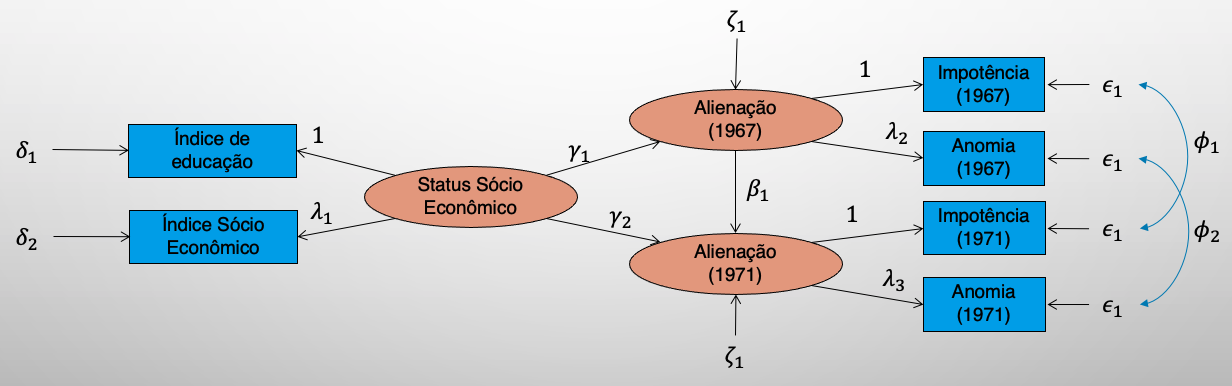

In [49]:
%%R

modelo <- "
# Cargas fatoriais
ALI67 =~ Anomia67 + Powles67

ALI71 =~ Anomia71 + Powles71

SES =~ Educ + SEI

# Relações entre os construtos
ALI71 ~ ALI67
SES ~ ALI67 + ALI71

# Correlações
Anomia67 ~~ Anomia71
Powles67 ~~ Powles71
"

fit <- sem(modelo, data = df)

print(fitMeasures(fit, c("rmsea", "srmr", "cfi", "gfi", "agfi")))

summary(fit, standardized = TRUE)

rmsea  srmr   cfi   gfi  agfi 
0.000 0.005 1.000 0.999 0.996 
lavaan 0.6-8 ended normally after 32 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        17
                                                      
  Number of observations                          1000
                                                      
Model Test User Model:
                                                      
  Test statistic                                 2.283
  Degrees of freedom                                 4
  P-value (Chi-square)                           0.684

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Latent Variables:
                   Estimate  Std.Err  z-value  P(>|z|)   Std.lv  Std.all
  ALI67 =~                          